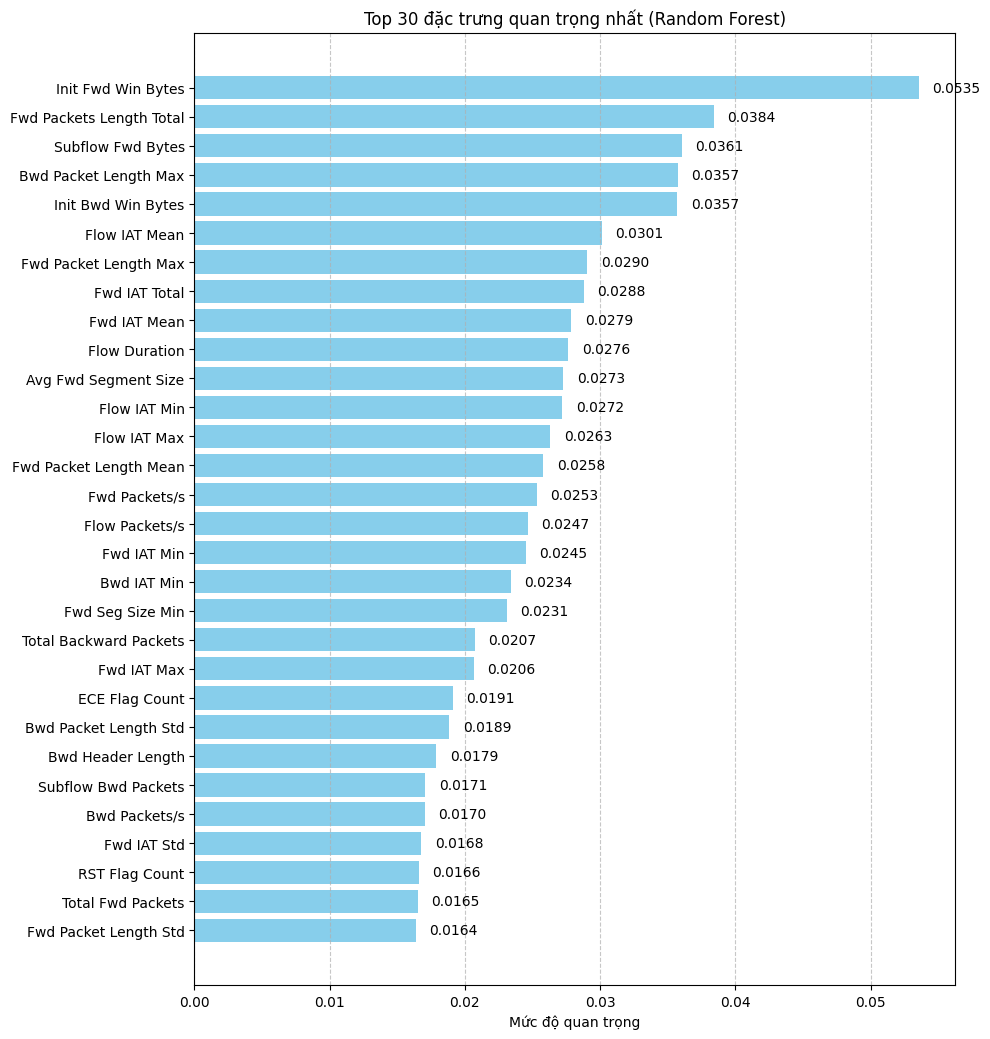

Đã chọn 15 đặc trưng với importance >= 0.025:
 - Init Fwd Win Bytes
 - Fwd Packets Length Total
 - Subflow Fwd Bytes
 - Bwd Packet Length Max
 - Init Bwd Win Bytes
 - Flow IAT Mean
 - Fwd Packet Length Max
 - Fwd IAT Total
 - Fwd IAT Mean
 - Flow Duration
 - Avg Fwd Segment Size
 - Flow IAT Min
 - Flow IAT Max
 - Fwd Packet Length Mean
 - Fwd Packets/s
Dữ liệu đã lưu vào fs15_output.csv


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Bước 1: Đọc dữ liệu
df = pd.read_csv("normalized_output.csv")
X = df.drop(columns=["Label"])
y = df["Label"]

# Bước 2: Huấn luyện Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Bước 3: Tính độ quan trọng đặc trưng
importances = rf.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Bước 4: Vẽ biểu đồ top 30 đặc trưng
top_k = 30
importance_df_topk = importance_df.head(top_k)

plt.figure(figsize=(10, top_k * 0.35))
plt.barh(importance_df_topk['Feature'], importance_df_topk['Importance'], color='skyblue')
plt.xlabel('Mức độ quan trọng')
plt.title(f'Top {top_k} đặc trưng quan trọng nhất (Random Forest)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Hiển thị số trên cột
for i, (imp, feat) in enumerate(zip(importance_df_topk['Importance'], importance_df_topk['Feature'])):
    plt.text(imp + 0.001, i, f'{imp:.4f}', va='center')

plt.tight_layout()
plt.show()

# Bước 5: Lọc các đặc trưng >= 0.025
rf15_features = importance_df[importance_df["Importance"] >= 0.025]["Feature"].tolist()

# In ra danh sách đặc trưng được chọn
print(f"Đã chọn {len(rf15_features)} đặc trưng với importance >= 0.025:")
for feat in rf15_features:
    print(f" - {feat}")

# Bước 6: Lưu dữ liệu đã chọn
df_fs15 = df[rf15_features + ["Label"]]
df_fs15.to_csv("fs15_output.csv", index=False)

print("Dữ liệu đã lưu vào fs15_output.csv")